In [3]:

dna_meth = pd.read_csv('G1_breast_dna-meth.csv')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
## Encode the labels in 1 hot encoding
from sklearn import svm, metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model


# Assigning labels 

In [5]:
#0 = solid 
#1 = primary tumour 

bool_tumor = [0 if value == 'Solid Tissue Normal' else 1 for value in dna_meth['Label'].values]

dna_meth['Boolean_tumor'] = bool_tumor

In [6]:
dna_meth

,Unnamed: 0,Label,cg00001583,cg00001747,cg00002719,cg00011616,cg00013655,cg00025347,cg00034076,cg00036011,...,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873,Boolean_tumor
0,TCGA.3C.AAAU.01,Primary Tumor,0.242943,0.031749,0.516227,0.941399,0.050625,0.254999,0.044503,0.055939,...,0.925235,0.482048,0.434733,0.394324,0.210427,0.578899,0.945994,0.418134,0.739519,1
1,TCGA.3C.AALI.01,Primary Tumor,0.020153,0.057154,0.783211,0.935964,0.623837,0.259896,0.221409,0.052228,...,0.952917,0.634238,0.567980,0.501837,0.098401,0.549295,0.961865,0.845781,0.102363,1
2,TCGA.3C.AALJ.01,Primary Tumor,0.462715,0.057074,0.697199,0.948888,0.625223,0.685907,0.140006,0.074468,...,0.026196,0.063643,0.456866,0.439822,0.066748,0.939740,0.714945,0.767472,0.512467,1
3,TCGA.3C.AALK.01,Primary Tumor,0.541054,0.545638,0.674409,0.184844,0.766111,0.537981,0.215374,0.513302,...,0.409943,0.470804,0.556485,0.052204,0.088968,0.039935,0.527980,0.813171,0.508490,1
4,TCGA.4H.AAAK.01,Primary Tumor,0.515059,0.616939,0.617353,0.114255,0.050625,0.537234,0.234295,0.085008,...,0.022932,0.472508,0.538383,0.946346,0.506823,0.935489,0.524704,0.066034,0.778554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,TCGA.WT.AB44.01,Primary Tumor,0.672427,0.695487,0.441444,0.132223,0.050625,0.464096,0.240594,0.370710,...,0.946249,0.059265,0.335304,0.513511,0.536523,0.563087,0.051110,0.054815,0.831032,1
876,TCGA.XX.A899.01,Primary Tumor,0.294309,0.517730,0.372236,0.394446,0.534657,0.424254,0.093658,0.054086,...,0.427424,0.447399,0.567532,0.039115,0.926969,0.954865,0.514547,0.503835,0.887302,1
877,TCGA.XX.A89A.01,Primary Tumor,0.367615,0.369683,0.451676,0.797703,0.050625,0.513636,0.075868,0.062335,...,0.959982,0.058040,0.963516,0.952358,0.489924,0.446231,0.035183,0.330966,0.905182,1
878,TCGA.Z7.A8R5.01,Primary Tumor,0.304950,0.077868,0.377488,0.271380,0.600615,0.749884,0.308027,0.242278,...,0.380140,0.452360,0.946218,0.524430,0.868085,0.058715,0.956065,0.067769,0.802486,1


# Save different tissues in variables for comparison

In [7]:
normal_tissue = dna_meth[dna_meth['Boolean_tumor'] == 0]

tumour_tissue = dna_meth[dna_meth['Boolean_tumor'] == 1]

In [8]:
tumour_tissue.shape, normal_tissue.shape

((783, 5003), (97, 5003))

# Method for visualising 

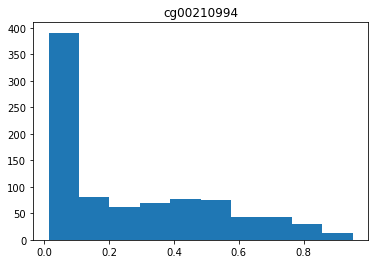

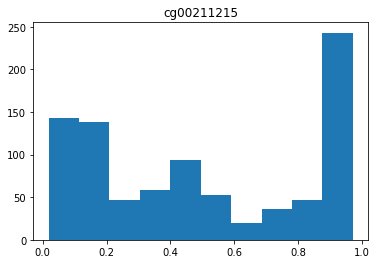

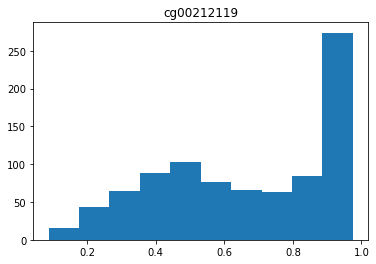

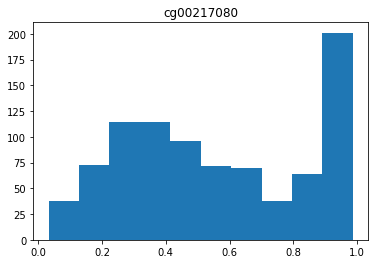

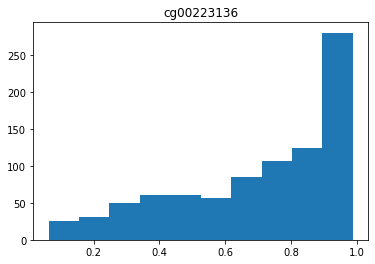

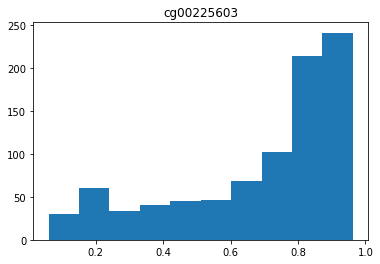

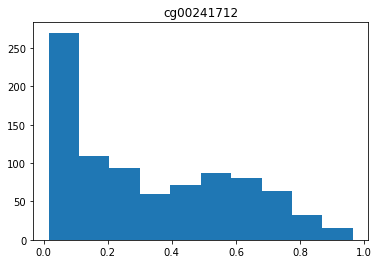

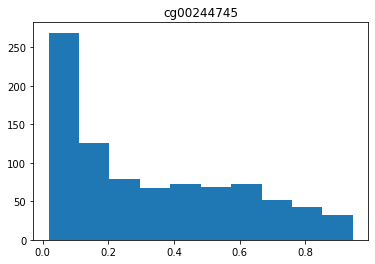

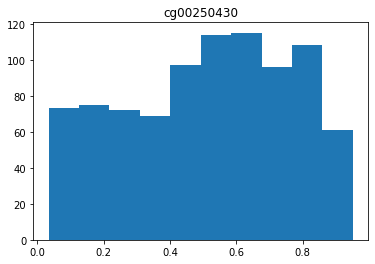

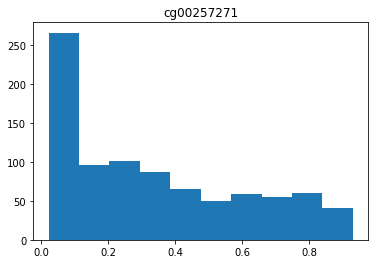

In [9]:
features = ['Unnamed: 0', 'Label', 'Boolean_tumor']

def display_data(data_frame, start, end):
    for col in data_frame.columns[start:end]:
        if col not in features:
            data = data_frame[col].values
            plt.hist(data)
            plt.title(col)
            plt.show()

display_data(dna_meth, 50, 60)            


# Min/Max scaling 

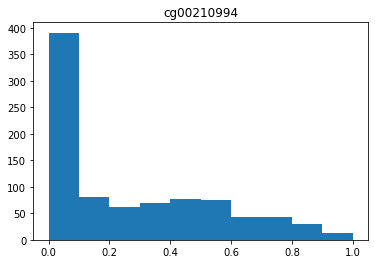

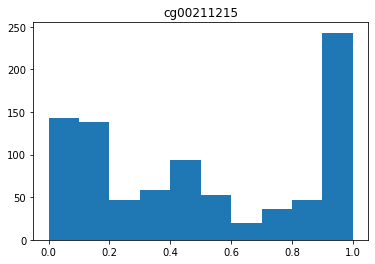

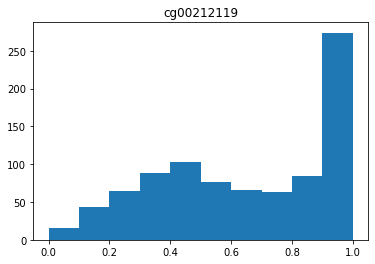

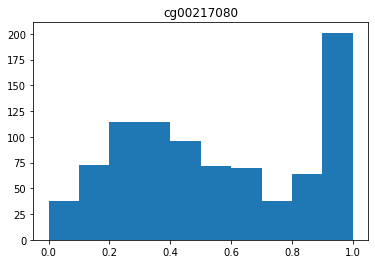

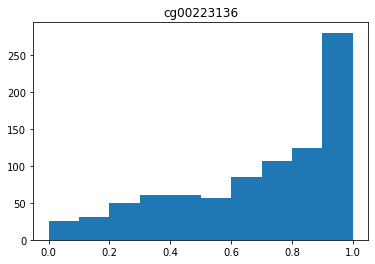

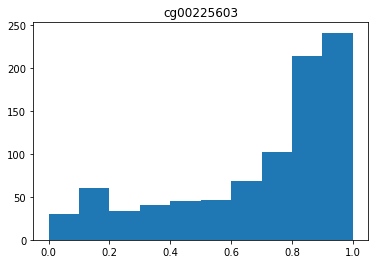

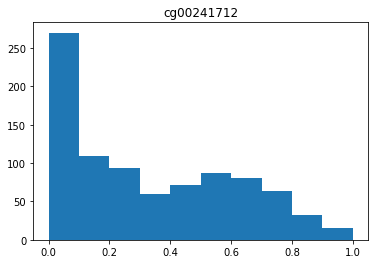

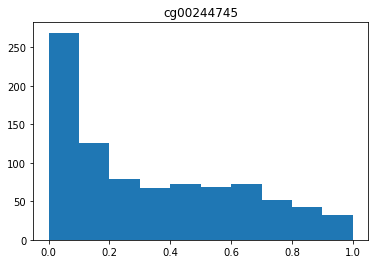

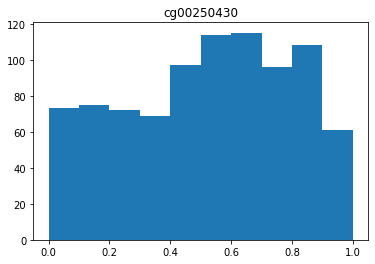

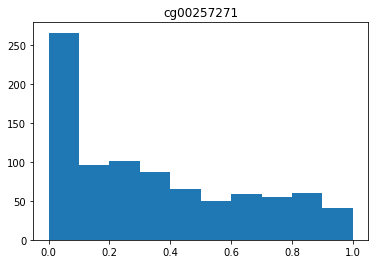

In [11]:
features = ['Unnamed: 0', 'Label', 'Boolean_tumor']

def min_max_display(data_frame, start, end):
    for col in data_frame.columns[start:end]:
        if col not in features:
            data = data_frame[col].values
            s_min = np.min(data)
            s_max = np.max(data)
            min_max = (data-s_min)/ (s_max - s_min)
            
            plt.hist(min_max)
            plt.title(col)
            plt.show()


min_max_display(dna_meth, 50, 60)

# Testing log fold change between cancer and normal tissue for feature selection

In [110]:
features = ['Unnamed: 0', 'Label', 'Boolean_tumor']
avg_meth_tumour = dict()
avg_meth_normal = dict()

#calculate means of both tumour and normal tissue methylation 
for col in tumour_tissue.columns:
    if col not in features:
        avg = np.mean(tumour_tissue[col].values)
        avg_meth_tumour[col] = avg

for col in normal_tissue.columns:
    if col not in features:
        avg = np.mean(normal_tissue[col].values)
        avg_meth_normal[col] = avg

log_fold_change = dict()

#calculate the log fold difference
#because we don't care about the direction of change, just 
#the magnitude, get absolute fold change and then sort 
for tumour, normal in zip(avg_meth_tumour.items(), avg_meth_normal.items()):
    log_fold_change[tumour[0]] = np.log2(abs(tumour[1]/normal[1]))

    
largest_diff = sorted(log_fold_change.items(), key=lambda x: x[1], reverse=True)

In [111]:
largest_diff

[('cg14123923', 4.00964499838694),
 ('cg14416371', 3.9495427627385773),
 ('cg16126280', 3.9178531447328253),
 ('cg01939477', 3.909969060318861),
 ('cg22538054', 3.8786645903119594),
 ('cg04638468', 3.8681683890534435),
 ('cg00100121', 3.8575891428628393),
 ('cg14038391', 3.8189880931643216),
 ('cg15556502', 3.807707180248542),
 ('cg13592399', 3.782109203171828),
 ('cg00002719', 3.7590160123117142),
 ('cg01419831', 3.7395692751752554),
 ('cg21819468', 3.736240813066608),
 ('cg13643914', 3.7072974980727125),
 ('cg25958283', 3.6993681268834893),
 ('cg21277995', 3.6963078281798936),
 ('cg03612722', 3.6951108381982745),
 ('cg04575395', 3.679372986082804),
 ('cg23180938', 3.677529325532338),
 ('cg22868282', 3.6640147279090347),
 ('cg05542262', 3.6584229891936593),
 ('cg08195943', 3.6556572741398803),
 ('cg01016662', 3.6403865787033807),
 ('cg04976324', 3.637345742186668),
 ('cg16166796', 3.6284016416455684),
 ('cg00557947', 3.6238872136567153),
 ('cg03205103', 3.6188232866793713),
 ('cg11270

In [112]:
top_20_cpg = largest_diff[:20]


In [113]:
for x in top_20_cpg: 
    print(x[0]+',')

cg14123923,
cg14416371,
cg16126280,
cg01939477,
cg22538054,
cg04638468,
cg00100121,
cg14038391,
cg15556502,
cg13592399,
cg00002719,
cg01419831,
cg21819468,
cg13643914,
cg25958283,
cg21277995,
cg03612722,
cg04575395,
cg23180938,
cg22868282,


# Testing variability and selecting most variable features

In [81]:
std_features = dict()

for col in dna_meth.columns:
    if col not in features:
    
        std = np.std(dna_meth[col].values)    
        std_features[col] = std
        
largest_sd = sorted(std_features.items(), key=lambda x: x[1], reverse=True)

In [84]:
largest_sd[0:20]

[('rs5987737', 0.36493072329975174),
 ('rs133860', 0.3592437993217086),
 ('rs798149', 0.35505909696763915),
 ('rs10846239', 0.35439218283660606),
 ('rs213028', 0.3542653811274338),
 ('rs1416770', 0.35414396515230523),
 ('rs1510189', 0.35319352093280004),
 ('cg16620382', 0.3528655158143245),
 ('rs472920', 0.35278333789668476),
 ('cg27363327', 0.35121337533147673),
 ('cg11738485', 0.351078196693406),
 ('rs2385226', 0.34994225694323705),
 ('rs2857639', 0.34993177773150475),
 ('rs3936238', 0.34987592498883063),
 ('rs1484127', 0.34961441549463596),
 ('cg01682111', 0.3475871382193578),
 ('rs1495031', 0.3464848619218526),
 ('rs877309', 0.3464558456666),
 ('rs3818562', 0.34625412081070556),
 ('rs6991394', 0.34607134306989545)]

# Checking how data correlates - min/max scaling

In [134]:
cpg = ['cg14123923','cg14416371','cg16126280','cg01939477',
'cg22538054','cg04638468','cg00100121','cg14038391','cg15556502',
'cg13592399','cg00002719','cg01419831','cg21819468','cg13643914',
'cg25958283','cg21277995','cg03612722','cg04575395',
'cg23180938','cg22868282']

selected_features = dna_meth[cpg]


In [135]:
scaler = MinMaxScaler()
       
selected_features[cpg] = scaler.fit_transform(selected_features[cpg])                      

/home/seb-porras/miniconda3/envs/scie3100/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [137]:
selected_features.describe()

,cg14123923,cg14416371,cg16126280,cg01939477,cg22538054,cg04638468,cg00100121,cg14038391,cg15556502,cg13592399,cg00002719,cg01419831,cg21819468,cg13643914,cg25958283,cg21277995,cg03612722,cg04575395,cg23180938,cg22868282
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,0.302986,0.448434,0.360348,0.394759,0.307731,0.341588,0.499523,0.368800,0.352426,0.311326,0.473278,0.378510,0.320450,0.233802,0.354935,0.286009,0.240160,0.287073,0.369401,0.378781
std,0.279160,0.318446,0.312497,0.275491,0.286021,0.309714,0.323654,0.294962,0.257065,0.278868,0.305834,0.275368,0.276211,0.275383,0.309371,0.302999,0.291520,0.264017,0.280473,0.286396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021808,0.042479,0.015287,0.087004,0.018859,0.015332,0.176227,0.025171,0.040053,0.013814,0.184290,0.083095,0.020859,0.013516,0.029107,0.011379,0.009828,0.023641,0.028348,0.044012
50%,0.255769,0.529906,0.373580,0.440583,0.246709,0.313069,0.562767,0.410172,0.401244,0.282925,0.512399,0.397693,0.309984,0.080096,0.319438,0.158447,0.044294,0.237806,0.408005,0.412089
75%,0.541282,0.723049,0.638948,0.611363,0.551817,0.609339,0.783856,0.613815,0.554641,0.537977,0.734781,0.608205,0.531563,0.426848,0.632986,0.552614,0.508735,0.496460,0.604079,0.606968
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'heatmap of most highly exp genes')

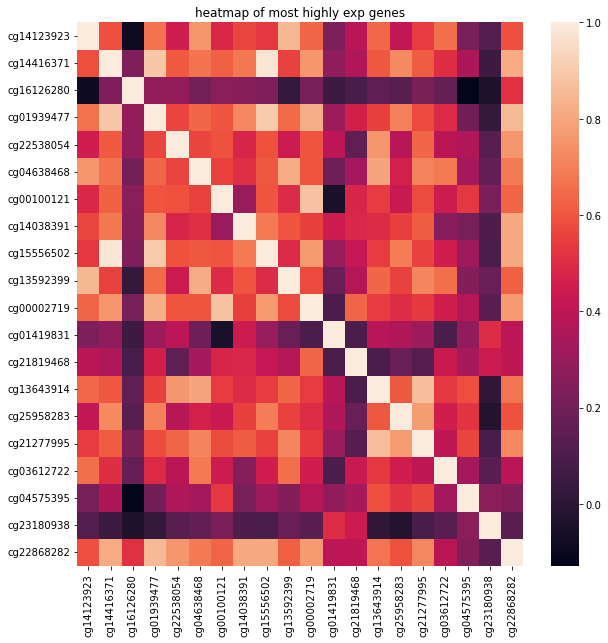

In [138]:
plt.figure(figsize=(10,10))
sns.heatmap(selected_features.iloc[0:20,:].corr())

plt.title("heatmap of most highly exp genes")

# PCA analysis 

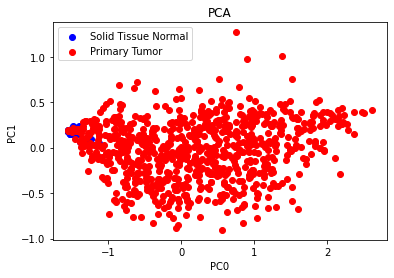

Text(0.5, 1.0, 'proportion of variance explained')

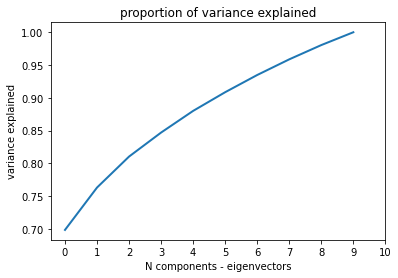

In [149]:
colours = ['blue', 'red']

data = dna_meth.loc[:, dna_meth.columns.isin(cpg)].values

scaler = MinMaxScaler(copy=True)
data = scaler.fit_transform(data)

pca = PCA(n_components=10)
pc_data = pca.fit_transform(data)

tissues = ['Solid Tissue Normal', 'Primary Tumor']

for i, tissue in enumerate(tissues):
    #gives you index of where each data point is
    tissue_idxs = np.where(dna_meth['Label'].values == tissue)
    sc = plt.scatter(pc_data[tissue_idxs, 0], pc_data[tissue_idxs, 1], label=tissue, marker='o', color=colours[i])

plt.legend()
plt.title('PCA')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.show()

plt.title("Scree Graph of eigenvectors vs eigenvalues")

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cumulative_var_explained = np.cumsum(percentage_var_explained)

plt.plot(cumulative_var_explained, linewidth=2)
plt.xlabel("N components - eigenvectors")
plt.ylabel("variance explained")
plt.xticks(np.arange(0, 11, 1))
plt.title("proportion of variance explained")

# Create testing and training data

In [154]:
min_max_data = data
labels = dna_meth['Boolean_tumor'].values

In [164]:
X_train, X_test, y_train, y_test = train_test_split(min_max_data, labels, test_size=0.2, random_state=1)

#data shapes - check split data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(704, 20)
(176, 20)
(704,)
(176,)


# Run a linear SVM - Training data performance

/home/seb-porras/miniconda3/envs/scie3100/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


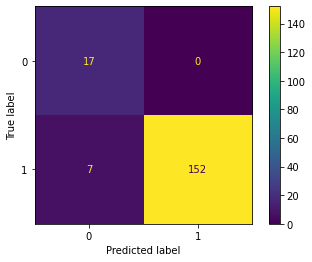

In [165]:
clf_lin = svm.LinearSVC()
clf_lin.fit(X_train, y_train)
plot_confusion_matrix(clf_lin, X_test, y_test)  
plt.show()


# How well does our model perform on test data? Very well

Accuracy: 0.9602272727272727
Precision: 0.9718276515151515
Recall: 0.9602272727272727


/home/seb-porras/miniconda3/envs/scie3100/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


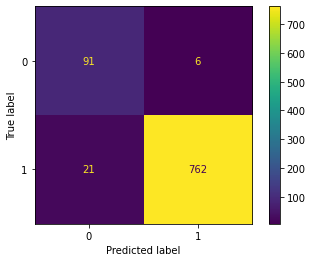

Training set Accuracy: 0.9715909090909091
Training set Precision: 0.9732880755608029
Training set Recall: 0.9715909090909091


In [162]:

y_pred = clf_lin.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what is the percentage of positive class predictions that actually belong to the positive class?
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))
# Model Recall: what is the percentage of positive class predictions made out of all positive examples in the dataset.
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

plot_confusion_matrix(clf_lin, data, labels) 
plt.show()

y_pred_train = clf_lin.predict(X_train)
# Model Accuracy: how often is the classifier correct?
print("Training set Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
# Model Precision: what is the percentage of positive class predictions that actually belong to the positive class?
print("Training set Precision:",metrics.precision_score(y_train, y_pred_train, average='weighted'))
# Model Recall: what is the percentage of positive class predictions made out of all positive examples in the dataset.
print("Training set Recall:",metrics.recall_score(y_train, y_pred_train, average='weighted'))
